In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、函数语法：

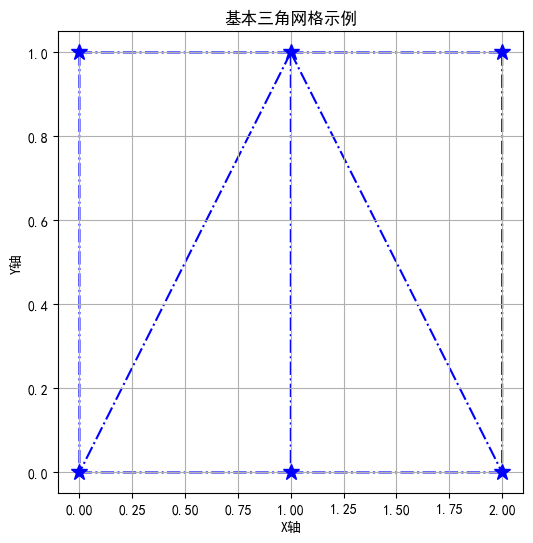

In [3]:
# 创建示例数据点
x = np.array([0, 1, 2, 0, 1, 2])
y = np.array([0, 0, 0, 1, 1, 1])

plt.figure(figsize=(6, 6))

# 绘制三角网格
plt.triplot(
    x,y,            # 三角形顶点的坐标数组
    'b*-.',         # 格式字符串，指定样式
    markersize=12   # 顶点标记的大小
)

plt.title('基本三角网格示例')
plt.xlabel('X轴')
plt.ylabel('Y轴')
plt.grid(True)
plt.show()

# 2、使用示例：

### 示例 1：triplot()函数三种调用语法

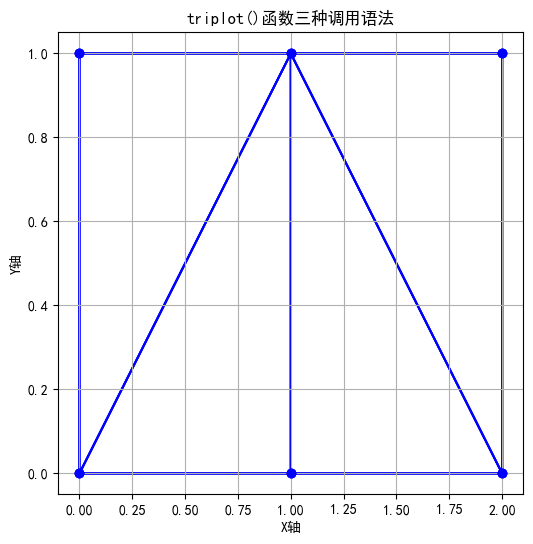

In [4]:
# 创建示例数据点
x = np.array([0, 1, 2, 0, 1, 2])
y = np.array([0, 0, 0, 1, 1, 1])

plt.figure(figsize=(6, 6))

# ======================================
# 方法一：
# 根据坐标点 x, y 绘制三角网格，三角剖分将即时计算
# ======================================
plt.triplot(x,y, 'bo-')

# ======================================
# 方法二：
# 除了坐标点 x, y，还指定了 triangles 连接矩阵
# ======================================
# 定义三角形连接方式（每个三角形由三个点的索引定义）
triangles = [[0, 3, 4], [0, 1, 4], [1, 4, 2], [2, 5, 4]]
plt.triplot(x,y,triangles, 'bo-')

# ======================================
# 方法三：
# 使用已创建的 Triangulation 对象绘制三角网格
# ======================================
from matplotlib.tri import Triangulation
# 定义三角形连接方式（每个三角形由三个点的索引定义）
triangles = [[0, 3, 4], [0, 1, 4], [1, 4, 2], [2, 5, 4]]
# 创建三角剖分对象
triang = Triangulation(x, y, triangles)
plt.triplot(triang, 'bo-')


plt.title('triplot()函数三种调用语法')
plt.xlabel('X轴')
plt.ylabel('Y轴')
plt.grid(True)
plt.show()

### 示例 2：掩码 (mask)

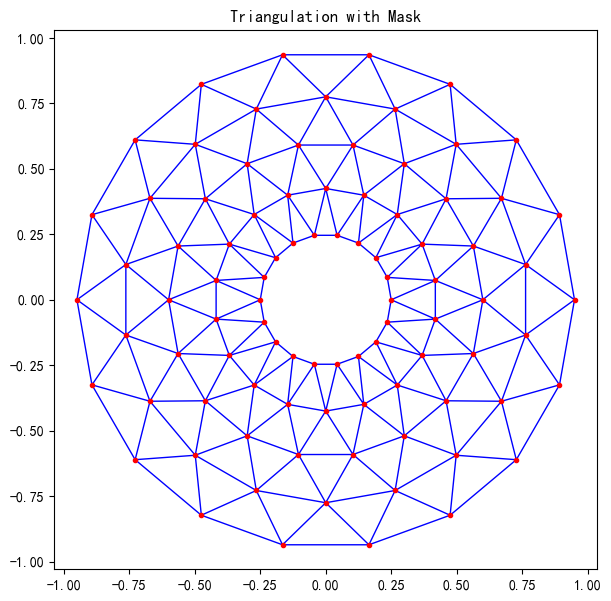

In [5]:
from matplotlib.tri import Triangulation

# 生成极坐标网格示例数据
n_angles = 18
n_radii = 5
min_radius = 0.25
radii = np.linspace(min_radius, 0.95, n_radii)
angles = np.linspace(0, 2 * np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi / n_angles  # 交替行的角度偏移

x = (radii * np.cos(angles)).flatten()
y = (radii * np.sin(angles)).flatten()

# 创建Triangulation
triang = Triangulation(x, y)

# 屏蔽掉中心附近的三角形（半径小于min_radius）
min_radius = 0.3
triang.set_mask(np.hypot(x[triang.triangles].mean(axis=1),
                     y[triang.triangles].mean(axis=1)) < min_radius)

plt.figure(figsize=(7, 7))
# 绘制三角网格
plt.triplot(triang, 'b-', lw=1)

plt.plot(x, y, 'ro', ms=3)       # 叠加红色小圆点
plt.title('Triangulation with Mask')
plt.axis('equal') # 保证坐标轴等比例，图形不变形
plt.show()

### 示例 3：绘制带颜色映射的三角网格

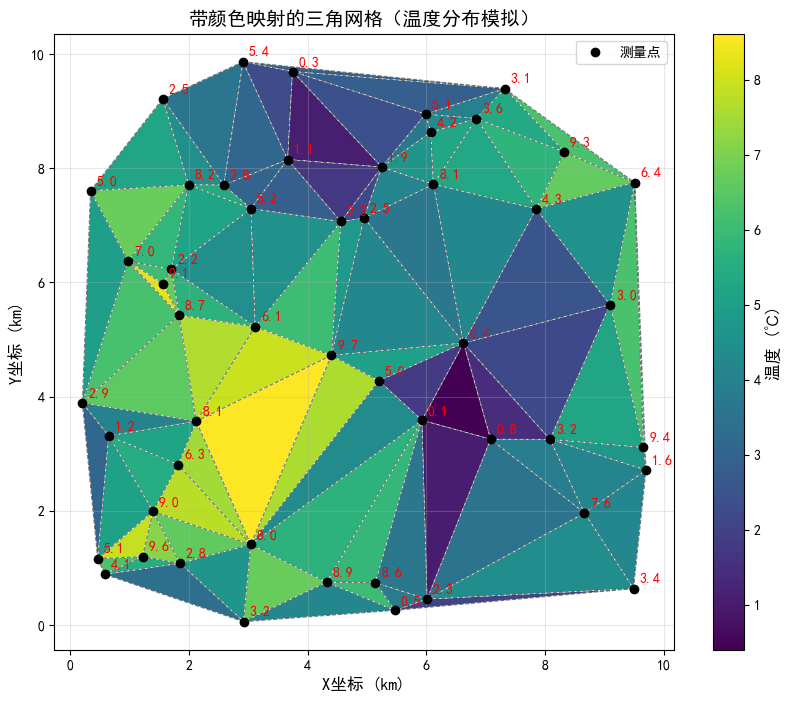

In [6]:
# 生成顶点和自动三角剖分
np.random.seed(42)
n_vertices = 50  # 顶点数量
x = np.random.rand(n_vertices) * 10
y = np.random.rand(n_vertices) * 10
# 生成与顶点对应的随机数据（模拟温度，范围0-10）
z = np.random.rand(n_vertices) * 10

fig, ax = plt.subplots(figsize=(10, 8))

# 使用tripcolor()填充三角形（根据顶点数据插值）
tripcolor = ax.tripcolor(x, y, z, cmap='viridis', edgecolor='white', linewidth=0.5)

# 绘制三角网格
ax.triplot(x, y, color='black', linestyle='--', linewidth=0.8, alpha=0.5)

# 标记顶点并添加数据标签
ax.plot(x, y, 'ko', markersize=6, label='测量点')
for i, (xi, yi, zi) in enumerate(zip(x, y, z)):
    ax.text(xi + 0.1, yi + 0.1, f'{zi:.1f}', fontsize=10, color='red')

# 添加颜色条
cbar = fig.colorbar(tripcolor, ax=ax)
cbar.set_label('温度 (℃)', fontsize=12)

ax.set_title('带颜色映射的三角网格（温度分布模拟）', fontsize=14)
ax.set_xlabel('X坐标 (km)', fontsize=12)
ax.set_ylabel('Y坐标 (km)', fontsize=12)
ax.legend()
ax.grid(alpha=0.3)
plt.show()